```
From: https://github.com/ksatola
Version: 0.0.1

TODOs
1. OLS Assumptions class for Linear Regression

```

# Regression Algorithms
Regression is a supervised machine learning process. It is similar to classification, but rather than predicting a label, we try to predict a continuous value. If you are trying to predict a number, then use regression.

Sklearn supports many of the same classification models for regression problems. In fact, the API is the same, calling `.fit`, `.score`, and `.predict`. This is also true for the next-generation boosting libraries, XGBoost and LightGBM.

Though there are similarities with the classification models and hyperparameters, the evaluation metrics are different for regression. 

In [1]:
# Connect with underlying Python code
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '../src')

In [2]:
from datasets import (
    get_dataset,
    add_prefix_to_list_items
)

In [60]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# To eliminate Yellowbrick warming: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
import matplotlib.font_manager

import seaborn as sns

In [10]:
# This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. 
# It was obtained from the StatLib archive (http://lib.stat.cmu.edu/datasets/boston), 
# and has been used extensively throughout the literature to benchmark algorithms. 

df = get_dataset('boston_housing')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
from sklearn import (
    model_selection,
    preprocessing,
)

In [6]:
# Missing values?
df.isnull().mean().value_counts()

0.0    14
dtype: int64

In [11]:
y = df[['medv']]
X = df.drop(columns=['medv'])

In [13]:
y

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
# Standardize data
cols = X.columns
Xs = preprocessing.StandardScaler().fit_transform(X.values)
Xs

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [30]:
Xs_df = pd.DataFrame(Xs, index=X.index, columns=X.columns)
Xs_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [31]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs_df, y, test_size=0.3, random_state=42)

In [32]:
Xs_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
5,-0.417044,-0.487722,-1.306878,-0.272599,-0.835284,0.207096,-0.351157,1.077737,-0.752922,-1.106115,0.113032,0.410571,-1.043322
116,-0.405205,-0.487722,-0.164408,-0.272599,-0.066472,-0.154767,0.139579,-0.506241,-0.408041,0.141134,-0.303094,0.401580,-0.085935
45,-0.400569,-0.487722,-0.616727,-0.272599,-0.921667,-0.858548,-1.236615,0.620527,-0.752922,-1.040783,-0.256858,0.441052,-0.342453
16,-0.297868,-0.487722,-0.437258,-0.272599,-0.144217,-0.498110,-1.396638,0.334449,-0.637962,-0.601276,1.176466,0.330860,-0.851284
468,1.392077,-0.487722,1.015999,-0.272599,0.218592,-0.510932,0.086238,-0.421483,1.661245,1.530926,0.806576,0.132296,0.767723


## Baseline Model
A baseline regression model will give us something to compare our other models to. In sklearn, the default result of the `.score` method is the `coefficient of determination (r² or R²)`. This number explains the percent of variation of the input data that the prediction captures. The value is typically between 0 and 1, but it can be negative in the case of particulary bad models.

The default strategy of the `DummyRegressor` is to predict the mean value of the training set. We can see that this model does not perform very well.

In [34]:
from sklearn.dummy import DummyRegressor

dr = DummyRegressor()
dr.fit(Xs_train, ys_train)
dr.score(Xs_test, ys_test)

-0.03469753992352409

## Linear Regression
[Simple linear regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) is taught in math and beginning statistics courses. It tries to fit a form of the formula `y = mx + b` while minimizing the square of the errors. When solved, we have an intercept and coefficient. The `intercept` gives a base value for a prediction modified by adding the product of the `coefficient` and the input.

This form can be generalized to higher dimensions. In that case each feature has a `coefficient`. The larger the absolute value of the coefficient, the more impact the feature has on the target.

This model assumes that the prediction is a linear combination of the inputs. For some datasets, this is not flexible enough. Complexity can be added by transforming the features (the sklearn `preprocessing.PolynomialFeatures` transformer can create polynomial combinations of the features). If this leads to overfitting, `ridge` and `lasso` regression may be used to regularize the estimator.

This model is also susceptible to `heteroscedasticity`. This is the idea that as the input values change in size, the error of the prediction (or the residuals) often changes as well. If you plot the input against the residuals, you will see a fan or cone shape. We will see examples of that later.

Another issue to be aware of is `multicollinearity`. If columns have high correlation, it can hinder interpretation of the coefficients. This usually does not impact the model, only coefficient meaning.

A linear regression model has the following properties:
- **Runtime efficiency:** Use n_jobs to speed up performance.
- **Preprocess data:** Standardize data before training the model.
- **Prevent overfitting:** You can simplify the model by not using or adding polynomial features.
- **Interpret results:** Can interpret results as weights for feature contribution, but assumes normality and independence of features. You might want to remove colinear features to improve interpretability. R² will tell you how much of the total variance of the outcome is explained by the model.

In [49]:
from sklearn.linear_model import LinearRegression

# Non-standardized data
lr = LinearRegression(n_jobs=-1)
lr.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [50]:
lr.score(X_test, y_test)

0.7112260057484903

In [51]:
lr.coef_

array([[-1.33470103e-01,  3.58089136e-02,  4.95226452e-02,
         3.11983512e+00, -1.54170609e+01,  4.05719923e+00,
        -1.08208352e-02, -1.38599824e+00,  2.42727340e-01,
        -8.70223437e-03, -9.10685208e-01,  1.17941159e-02,
        -5.47113313e-01]])

In [52]:
lr.intercept_

array([31.63108404])

The `.intercept_` value is the `expected mean value`. You can see how scaling the data affects the coefficients. `The sign of the coefficients` explains the direction of the relation between the feature and the target. A positive sign indicates that as the feature increases, the label increases. A negative sign indicates that as the feature increases, the label decreases. The larger the absolute value of the coefficient, the more impact it has.

In [53]:
# Standardized data
lrs = LinearRegression(n_jobs=-1)
lrs.fit(Xs_train, ys_train)

LinearRegression(n_jobs=-1)

In [54]:
lrs.score(Xs_test, ys_test)

0.7112260057484925

In [55]:
lrs.coef_

array([[-1.14691411,  0.83432605,  0.33940694,  0.79163612, -1.784727  ,
         2.84783949, -0.30429306, -2.91562521,  2.11140045, -1.46519951,
        -1.9696347 ,  1.07567771, -3.90310727]])

In [56]:
lrs.intercept_

array([22.50945471])

Use Yellowbrick to visualize coefficients. Because the scaled Boston data is a numpy array rather than a pandas DataFrame, we need to pass the `labels` parameter if we want to use the column names.

```
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's
```

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
/usr/local/lib/python3.8/dist-packages/yellowbrick/model_selection/importances.py:190: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


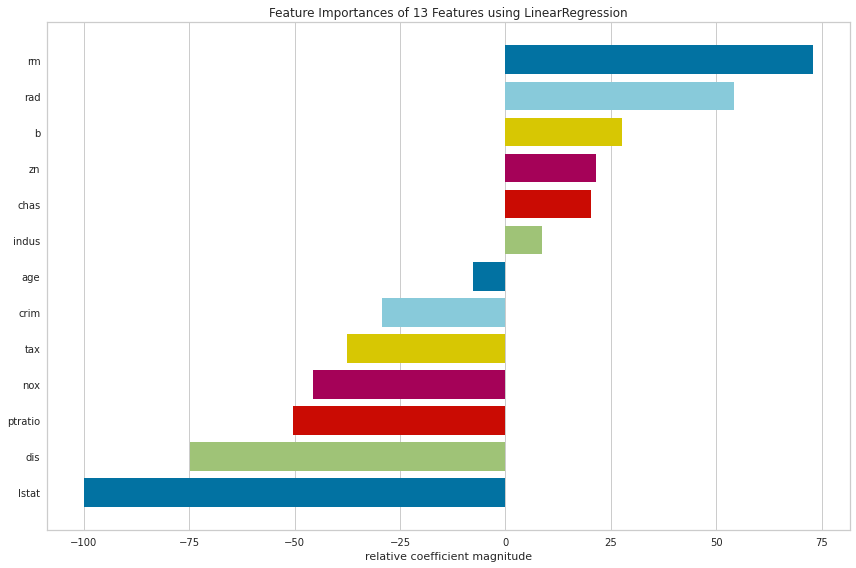

In [63]:
from yellowbrick.features import FeatureImportances

fig, ax = plt.subplots(figsize=(12, 8))
fi_viz = FeatureImportances(lrs, labels=X.columns)
fi_viz.fit(Xs_train, ys_train.values.ravel())
fi_viz.poof()
fig.savefig("images/regression_linear_regression.png", dpi=300)

## SVMs
Support vector machines can perform regression as well.

SVMs have the following properties:
- **Runtime efficiency:** The scikit-learn implementation is O(n⁴), so it can be hard to scale to large sizes. Using a linear kernel or the LinearSVR model can improve the runtime performance at perhaps the cost of accuracy. Upping the cache_size parameter can bring that down to O(n³).
- **Preprocess data:** The algorithm is not scale invariant, so standardizing the data is highly recommended.
- **Prevent overfitting:** 
- **Interpret results:** 

Runtime efficiency


Preprocess data


Prevent overfitting
The C (penalty parameter) controls regularization. A smaller value allows for a smaller margin in the hyperplane. A higher value for gamma will tend to overfit the training data. The LinearSVR model supports a loss and penalty parameter for regularization. The epsilon parameter can be raised (with 0 you should expect overfitting).

Interpret results
Inspect .support_vectors_, though these are hard to interpret. With linear kernels, you can inspect .coef_.

In [ ]:
- **Runtime efficiency:** 
- **Preprocess data:** 
- **Prevent overfitting:** 
- **Interpret results:** 